In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
df = pd.read_csv('POP.csv',parse_dates=True, index_col='date')
df.head()

,realtime_start,value,realtime_end
date,,,
1952-01-01,2019-12-06,156309.0,2019-12-06
1952-02-01,2019-12-06,156527.0,2019-12-06
1952-03-01,2019-12-06,156731.0,2019-12-06
1952-04-01,2019-12-06,156943.0,2019-12-06
1952-05-01,2019-12-06,157140.0,2019-12-06


In [13]:
df = df.drop(['realtime_start','realtime_end'],axis=1)

<AxesSubplot:xlabel='date'>

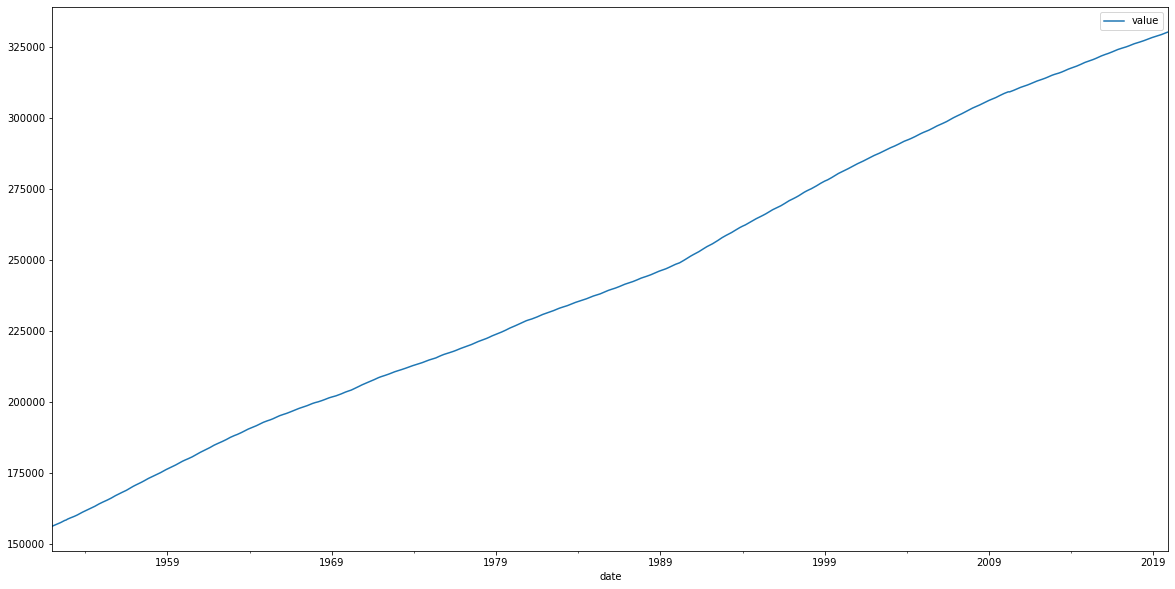

In [40]:
df.plot(figsize=(20,10))

In [23]:
pivot = pd.pivot_table(data=df,values='value',index=df.index.month , columns=df.index.year )

In [39]:
pivot

date,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,156309.0,158973.0,161690.0,164588.0,167513.0,170571.0,173533.0,176447.0,179386.0,182287.0,185242.0,188013.0,190668.0,193223.0,195539.0,197736.0,199808.0,201760.0,203849.0,206466.0,208917.0,210985.0,212932.0,214931.0,217095.0,219179.0,221477.0,223865.0,226451.0,228937.0,231157.0,233322.0,235385.0,237468.0,239638.0,241784.0,243981.0,246224.0,248659.0,251889.0,255214.0,258679.0,261919.0,265044.0,268151.0,271360.0,274626.0,277790.0,280976.0,283920.0,286788.0,289518.0,292192.0,294914.0,297647.0,300574.0,303506.0,306208.0,308833.000,310960.740,313183.179,315389.595,317593.923,319928.646,322232.862,324438.195,326454.123,328467.812
2,156527.0,159170.0,161912.0,164809.0,167746.0,170806.0,173746.0,176685.0,179597.0,182520.0,185452.0,188213.0,190858.0,193393.0,195688.0,197892.0,199920.0,201881.0,204008.0,206668.0,209061.0,211120.0,213074.0,215065.0,217249.0,219344.0,221629.0,224053.0,226656.0,229071.0,231313.0,233473.0,235527.0,237602.0,239788.0,241930.0,244131.0,246378.0,248827.0,252135.0,255448.0,258919.0,262123.0,265270.0,268364.0,271585.0,274838.0,277992.0,281190.0,284137.0,286994.0,289714.0,292368.0,295105.0,297854.0,300802.0,303711.0,306402.0,309027.000,311113.376,313338.977,315520.143,317753.883,320074.511,322398.098,324581.497,326600.823,328610.744
3,156731.0,159349.0,162124.0,165018.0,167977.0,171029.0,173945.0,176905.0,179788.0,182742.0,185650.0,188387.0,191047.0,193540.0,195831.0,198037.0,200056.0,202023.0,204156.0,206855.0,209212.0,211254.0,213211.0,215198.0,217381.0,219504.0,221792.0,224235.0,226849.0,229224.0,231470.0,233613.0,235675.0,237732.0,239928.0,242079.0,244279.0,246530.0,249012.0,252372.0,255703.0,259152.0,262352.0,265495.0,268595.0,271821.0,275047.0,278198.0,281409.0,284350.0,287190.0,289911.0,292561.0,295287.0,298060.0,301021.0,303907.0,306588.0,309212.000,311265.404,313499.369,315662.224,317917.203,320230.786,322551.468,324713.970,326736.690,328742.843
4,156943.0,159556.0,162350.0,165251.0,168221.0,171271.0,174176.0,177146.0,180007.0,182992.0,185874.0,188580.0,191245.0,193709.0,195999.0,198206.0,200208.0,202161.0,204401.0,207065.0,209386.0,211420.0,213361.0,215353.0,217528.0,219684.0,221991.0,224438.0,227061.0,229403.0,231645.0,233781.0,235839.0,237900.0,240094.0,242252.0,244445.0,246721.0,249306.0,252643.0,255992.0,259414.0,262631.0,265755.0,268853.0,272083.0,275304.0,278451.0,281653.0,284581.0,287397.0,290125.0,292779.0,295490.0,298281.0,301254.0,304117.0,306787.0,309191.211,311436.238,313667.127,315817.855,318089.218,320402.295,322721.212,324861.757,326887.866,328890.250
5,157140.0,159745.0,162564.0,165463.0,168436.0,171501.0,174397.0,177365.0,180222.0,183217.0,186087.0,188790.0,191447.0,193888.0,196178.0,198363.0,200361.0,202331.0,204607.0,207260.0,209545.0,211577.0,213513.0,215523.0,217685.0,219859.0,222176.0,224632.0,227251.0,229575.0,231809.0,233922.0,235993.0,238074.0,240271.0,242423.0,244610.0,246906.0,249565.0,252913.0,256285.0,259680.0,262877.0,265998.0,269108.0,272342.0,275564.0,278717.0,281877.0,284810.0,287623.0,290346.0,292997.0,295704.0,298496.0,301483.0,304323.0,306984.0,309369.053,311607.080,313830.530,315983.654,318269.505,320583.972,322899.995,325019.199,327048.704,329047.319
6,157343.0,159956.0,162790.0,165695.0,168659.0,171741.0,174639.0,177591.0,180444.0,183452.0,186314.0,189018.0,191666.0,194087.0,196372.0,198537.0,200536.0,202507.0,204830.0,207462.0,209725.0,211746.0,213686.0,215768.0,217861.0,220046.0,222379.0,224843.0,227522.0,229761.0,231992.0,234118.0,236160.0,238270.0,240459.0,242608.0,244806.0,247114.0,249849.0,253207.0,256589.0,259963.0,263152.0,266270.0,269386.0,27262

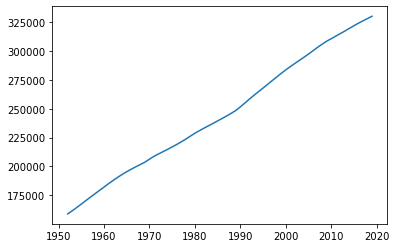

In [50]:
plt.plot(pivot.iloc[11])

In [53]:
df.describe()

,value
count,816.000000
mean,243847.767826
std,50519.140567
min,156309.000000
25%,201725.250000
50%,239557.500000
75%,289364.250000
max,330309.946000


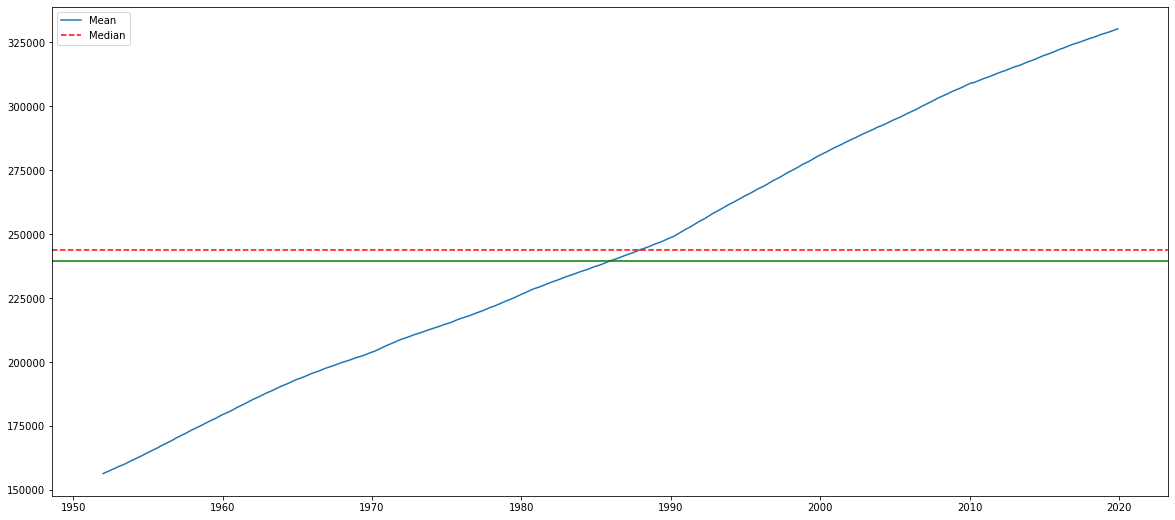

In [55]:
plt.figure(figsize=(20,9))
plt.plot(df)
plt.axhline(df.value.mean(), color='r', linestyle='--')
plt.axhline(df.value.median(), color='g', linestyle='-')
plt.legend({'Mean':df.mean(),'Median':df.median()})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

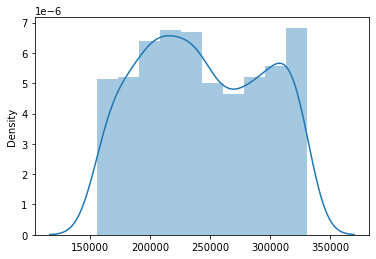

In [80]:
import seaborn as sns
sns.distplot(df)

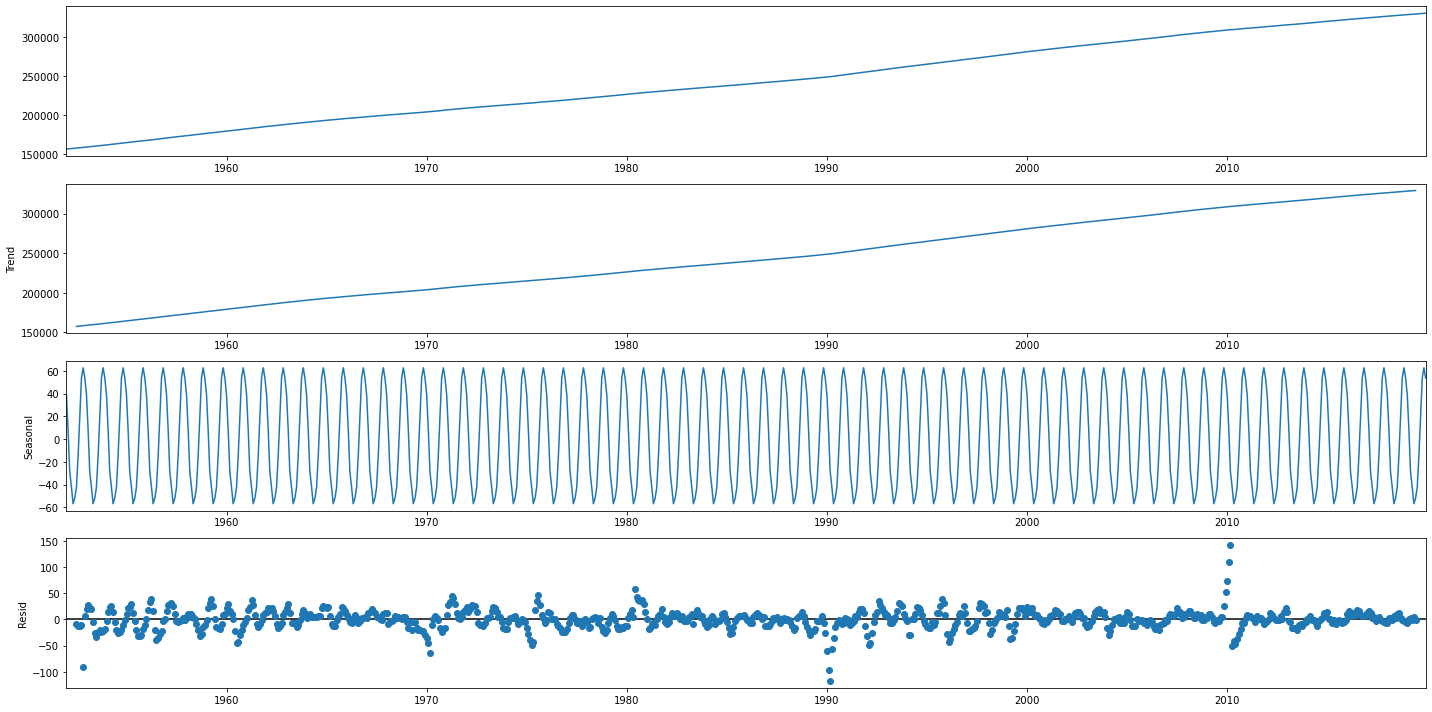

In [87]:
from   pylab                           import rcParams
rcParams['figure.figsize']= 20,10
decomp = seasonal_decompose(df,model='additive')
decomp.plot()
plt.show()

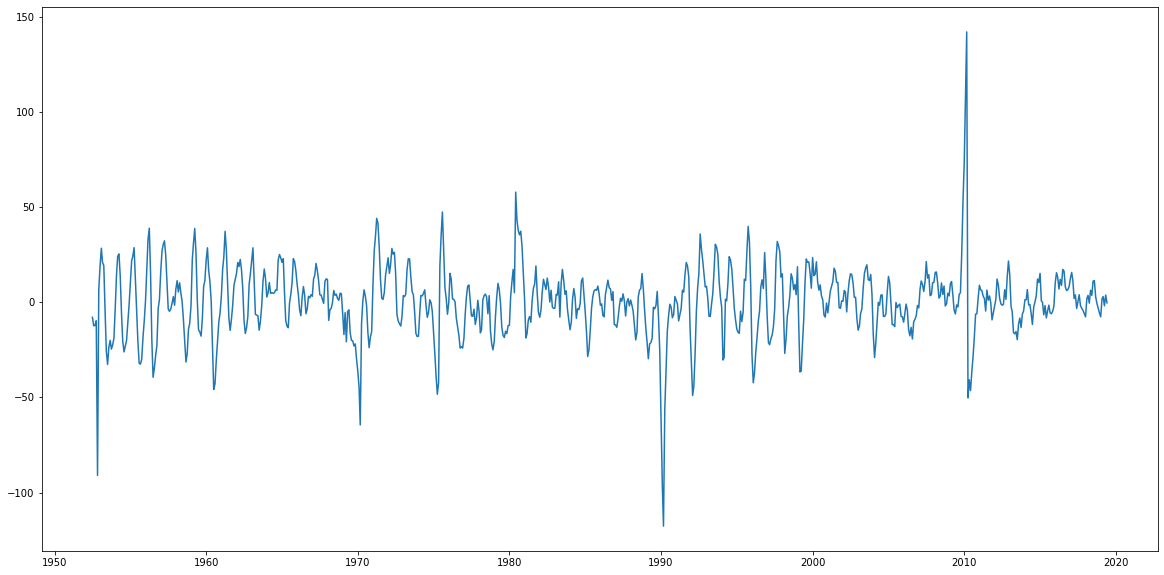

In [90]:
plt.plot(decomp.resid)

In [91]:
df_test = pd.read_csv('POPH.csv',parse_dates=True, index_col='date')
df_test.head()

,realtime_start,value,realtime_end
date,,,
1900-01-01,2019-12-06,76094000,2019-12-06
1901-01-01,2019-12-06,77584000,2019-12-06
1902-01-01,2019-12-06,79163000,2019-12-06
1903-01-01,2019-12-06,80632000,2019-12-06
1904-01-01,2019-12-06,82166000,2019-12-06


In [92]:
df_test = df_test.drop(['realtime_start','realtime_end'],axis=1)

In [93]:
roll_for = df.rolling(2,center=False).mean().shift(0)
roll_for1 = df.rolling(4).mean()
roll_for2 = df.rolling(6,center=True).mean()
roll_for3 = df.rolling(8,center=True).mean()

In [103]:
mod_exp = ExponentialSmoothing(df,trend='multiplicative',seasonal='additive',initialization_method='estimated')
mod_exp = mod_exp.fit()
mod_exp.params

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.995,
 'smoothing_trend': 0.10660714285714287,
 'smoothing_seasonal': 0.0050000000000000044,
 'damping_trend': nan,
 'initial_level': 157385.01666666658,
 'initial_trend': 1.0013916508994238,
 'initial_seasons': array([ 49.81510417,  31.15885417,   1.1171875 , -10.01822917,
        -42.99739583, -61.3515625 , -58.68489583, -33.5078125 ,
          3.73177083,  37.10677083,  31.4609375 ,  52.16927083]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [113]:
forcast_exp = mod_exp.predict(start='2019-12-01',end='2024-12-01')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


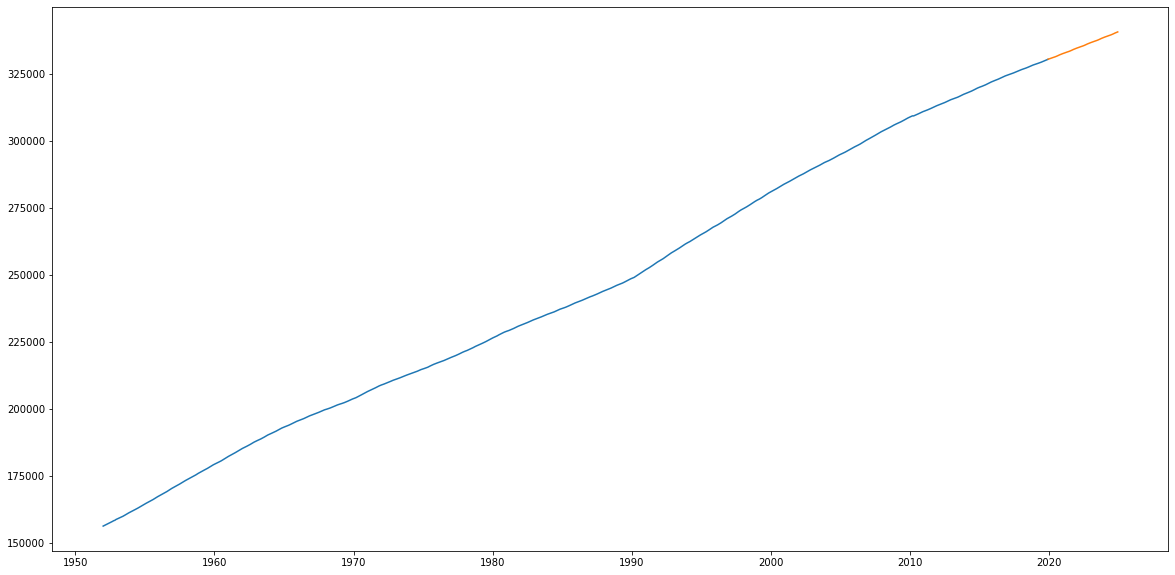

In [114]:
plt.plot(df)
plt.plot(forcast_exp)